In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
plt.style.use('fivethirtyeight')

In [22]:
plt.style.use('ggplot')
df = pd.read_csv('csvs_out.csv')

In [23]:
df=df.drop(['apk', 'date', 'timestamp', 'device', 'subsegment', 'name','esprit', 'tsm', 'fa', 'participant', 'fitzpatrick',
       'user_clothing_bottom', 'user_clothing_top', 'user_ability',
       'camera_height', 'user_distance', 'brightness', 'nudge', 'deepMove',
       'deepMatch'], axis = 1)

In [24]:
df = df.dropna()
# Delete rows where 'column_name' is -1
df = df[df['id'] != -1]
# selecting where rep_target is 10
df = df[df['rep_target'] == 10]
#creating new output row as MARE
df['MARE'] = df['rep_target'] - df['ensemble']
df.head(5)

,testing_type,orientation,version,id,rep_target,ensemble,MARE
0,TNR,HEADON,6.12.103,1262.0,10.0,7.0,3.0
2,TNR,HEADON,6.12.103,1269.0,10.0,2.0,8.0
4,TNR,HEADON,6.12.103,872.0,10.0,11.0,-1.0
6,TNR,HEADON,6.12.103,613.0,10.0,10.0,0.0
8,TNR,HEADON,6.12.103,612.0,10.0,7.0,3.0


In [25]:
exercise_id_329_TPR_df = df.loc[(df['id'] == 329) & (df['testing_type'] == 'TPR')]
exercise_id_329_TPR_df.head(5)

,testing_type,orientation,version,id,rep_target,ensemble,MARE
1051,TPR,HEADON,6.12.108,329.0,10.0,12.0,-2.0
1126,TPR,SIDEVIEW,6.12.105,329.0,10.0,11.0,-1.0
1348,TPR,SIDEVIEW,6.12.108,329.0,10.0,12.0,-2.0
1584,TPR,HEADON,6.12.105,329.0,10.0,14.0,-4.0
10605,TPR,SIDEVIEW,6.12.109,329.0,10.0,9.0,1.0


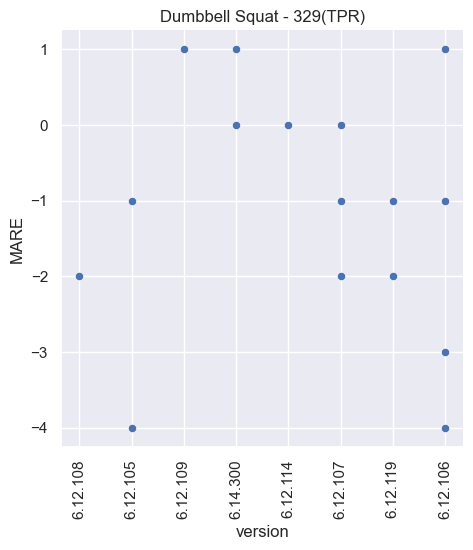

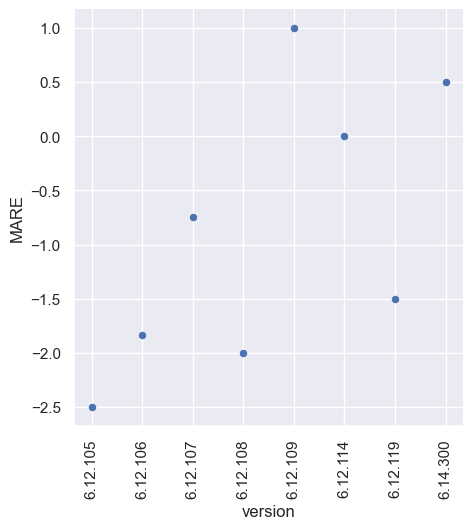

Text(0.5, 1.0, 'Exercise id - 329(TPR)')

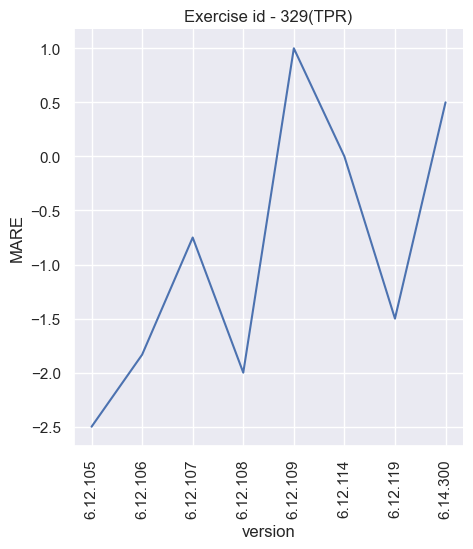

In [19]:
# Apply the default theme
sns.set_theme()
# Create a visualization
sns.relplot(data = exercise_id_329_TPR_df, x="version", y="MARE")
plt.xticks(rotation='vertical')
plt.title('Dumbbell Squat - 329(TPR)')
df1 = exercise_id_329_TPR_df[['version', 'MARE']]
grouped = df1.groupby('version')
average_df = grouped.mean()
df = pd.DataFrame(average_df)
sns.relplot(data = average_df, x="version", y="MARE")
plt.xticks(rotation='vertical')
plt.show()
sns.relplot(data=average_df, kind="line",x="version", y="MARE")
plt.xticks(rotation='vertical')
plt.title('Exercise id - 329(TPR)')

In [28]:
# library to get stock data
import ffn

# load daily stock prices for selected stocks from ffn
tickers = ["aapl", "msft", "tsla", "nvda", "intc"]
prices = ffn.get(tickers, start="2017-01-01")

# convert data into a 'long' table for this plotting exercise
df = prices.melt(ignore_index=False, var_name="ticker", value_name="closing_price")
df.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,ticker,closing_price
Date,,
2017-01-03,aapl,27.059305
2017-01-04,aapl,27.029022
2017-01-05,aapl,27.166477
2017-01-06,aapl,27.469336
2017-01-09,aapl,27.720940


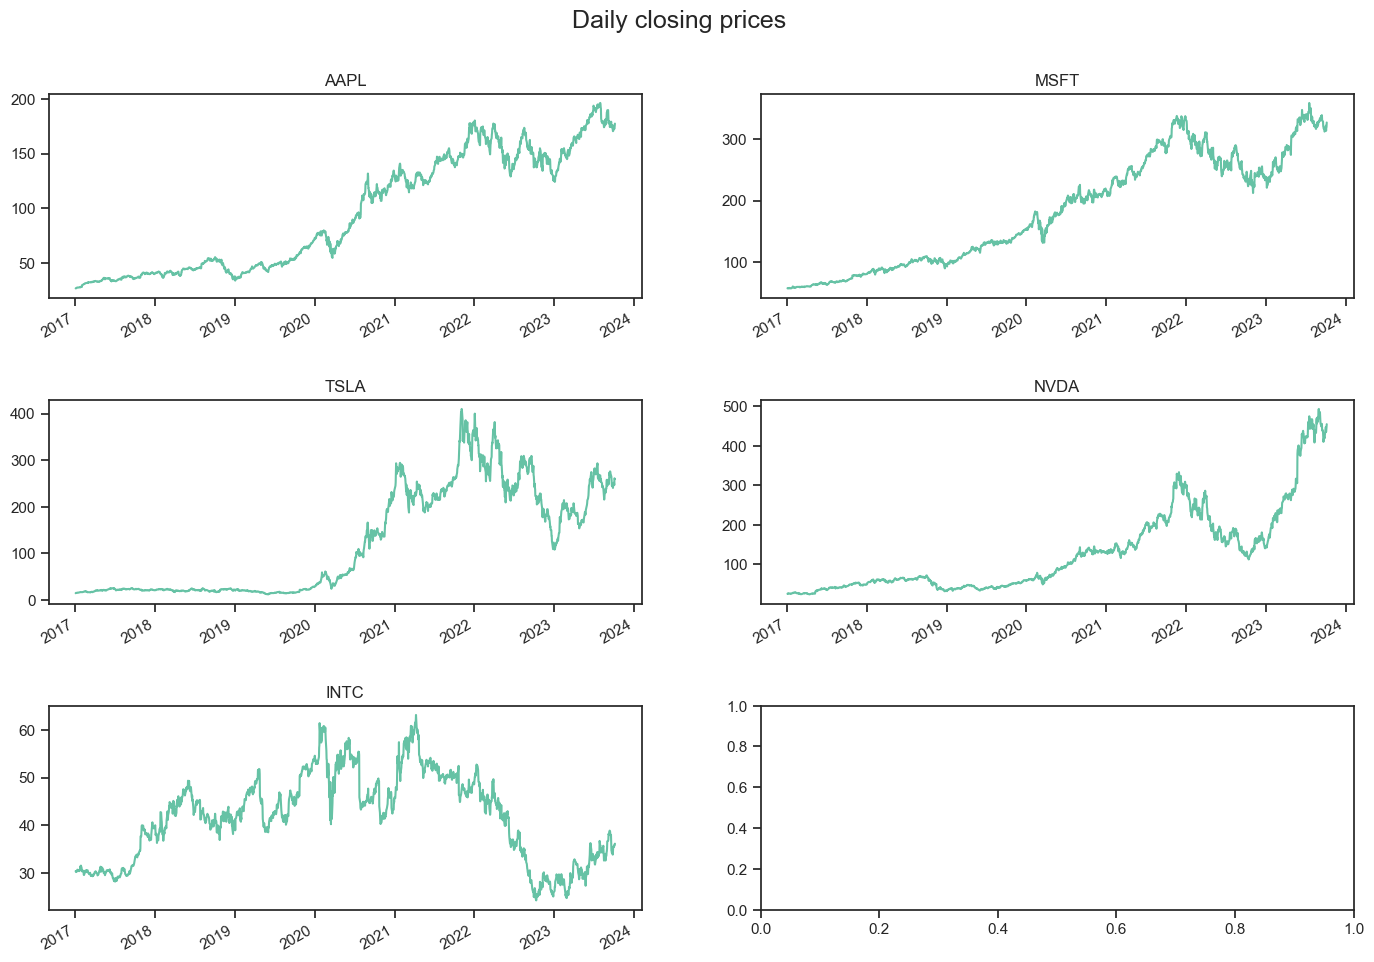

In [30]:
# define subplot grid
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Daily closing prices", fontsize=18, y=0.95)

# loop through tickers and axes
for ticker, ax in zip(tickers, axs.ravel()):
    # filter df for ticker and plot on specified axes
    df[df["ticker"] == ticker].plot(ax=ax)

    # chart formatting
    ax.set_title(ticker.upper())
    ax.get_legend().remove()
    ax.set_xlabel("")

plt.show()